In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import seaborn as sns
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

In [2]:
data_2010s = pd.read_csv('dataset/dataset-of-10s.csv')
data_2000s = pd.read_csv('dataset/dataset-of-00s.csv')
data_1990s = pd.read_csv('dataset/dataset-of-90s.csv')
data_1980s = pd.read_csv('dataset/dataset-of-80s.csv')

In [3]:
data_2010s.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [4]:
data_2000s.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [5]:
data_1990s.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [6]:
data_1980s.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [7]:
data_2010s["year"] = 2010
data_2000s["year"] = 2000
data_1990s["year"] = 1990
data_1980s["year"] = 1980

In [8]:
df_list = [data_2010s, data_2000s, data_1990s, data_1980s]
data = pd.concat(df_list)

In [9]:
data["duration_s"] = data["duration_ms"]/1000

In [10]:
data.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'year', 'duration_s'],
      dtype='object')

In [11]:
data_description = data.describe()

In [12]:
hits = data[data["target"] == 1]
flop = data[data["target"] == 0]

In [13]:
hits_description = hits.describe()
flop_description = flop.describe()

In [14]:
var_list = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'chorus_hit', 'duration_s']

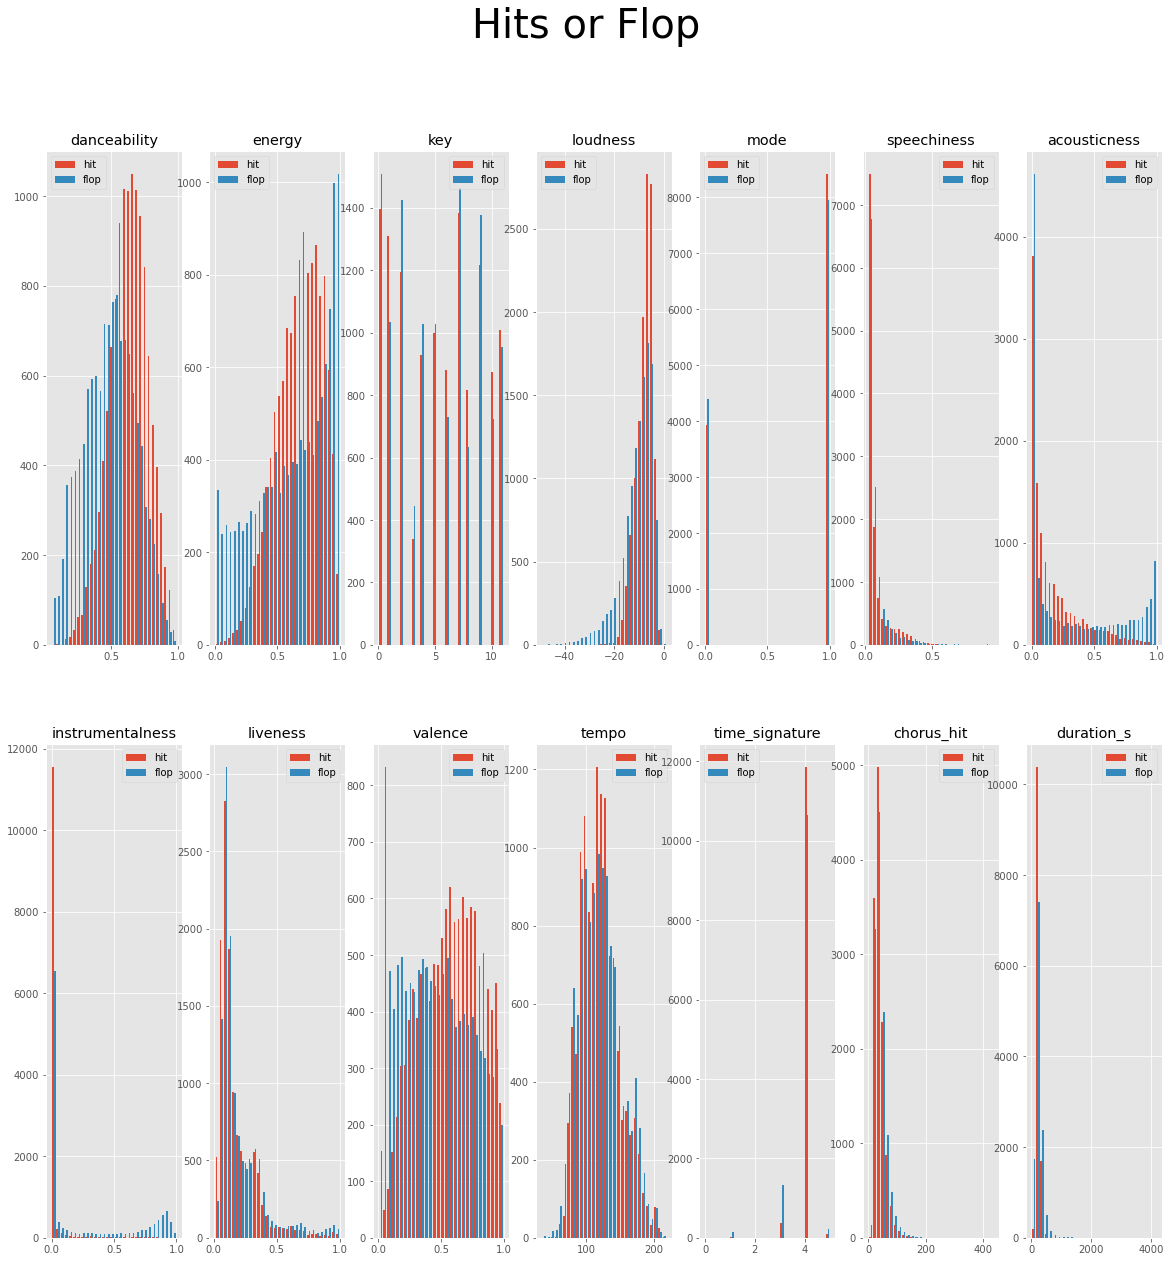

In [15]:
plt.style.use('ggplot')
fig, ax = plt.subplots(2, 7, figsize=(20, 20))
fig.suptitle('Hits or Flop', fontsize=40)

column_idx = 0
for i in range(2):
    for j in range(7):
        ax[i][j].hist([hits[var_list[column_idx]], flop[var_list[column_idx]]], bins=30, label=['hit', 'flop'])
        ax[i][j].set_title(var_list[column_idx])
        ax[i][j].legend()
        column_idx += 1
        
plt.savefig('image.png', facecolor='white')

In [16]:
h = 24
s = 0.99
v = 1
 
colors = [
    mcl.hsv_to_rgb((h/360,0,v)),
    mcl.hsv_to_rgb((h/360,0.5,v)),
    mcl.hsv_to_rgb((h/360,1,v))
]
cmap = LinearSegmentedColormap.from_list('my_cmap',colors,gamma=3)

In [17]:
data_corr = data.drop(['duration_ms'], axis=1)

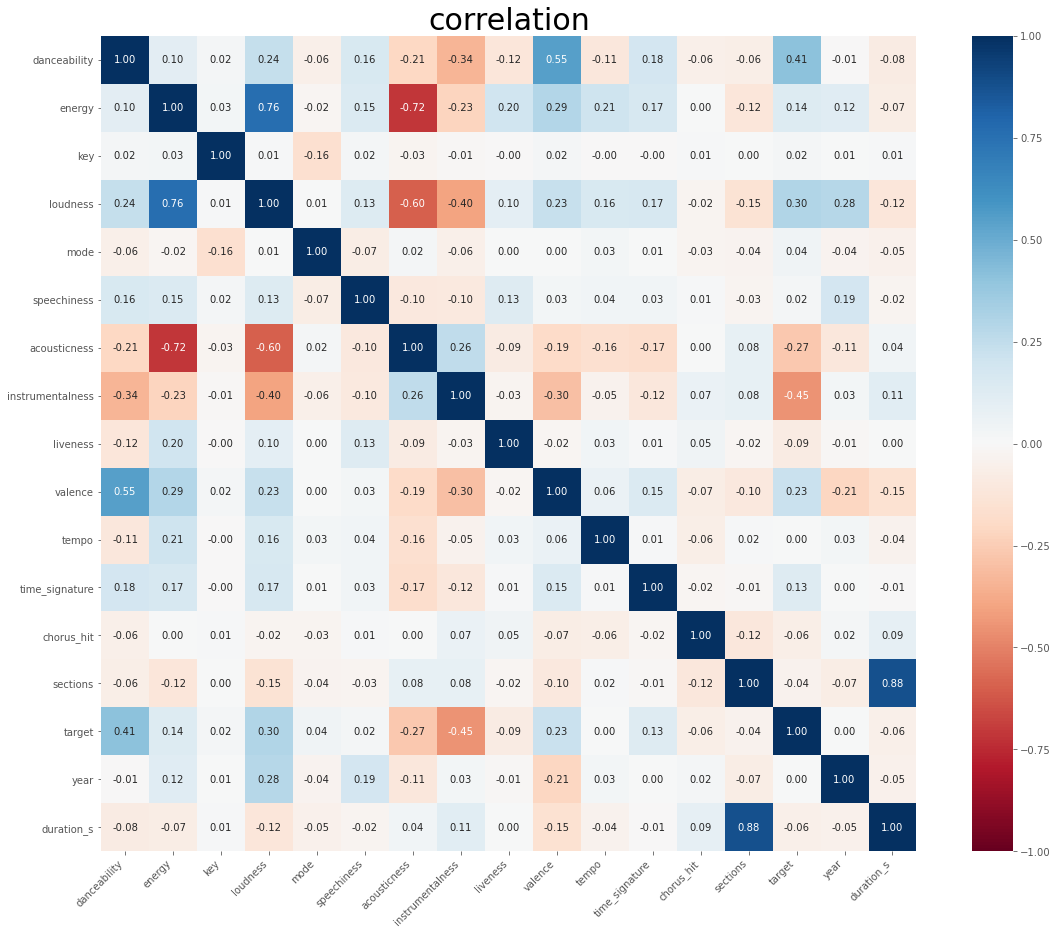

In [18]:
corr = data_corr.corr()
plt.style.use('ggplot')
plt.figure(figsize=(20, 15))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, cmap='RdBu', annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('correlation', fontsize=30)
plt.show();

In [19]:
# boxplot or violinplot 그리기

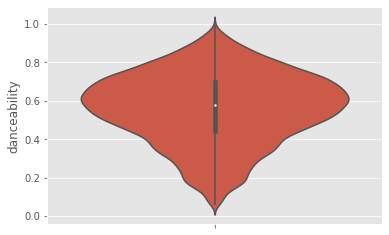

In [20]:
sns.violinplot(y='danceability', hue='target', data=data)
plt.show();

<AxesSubplot:>

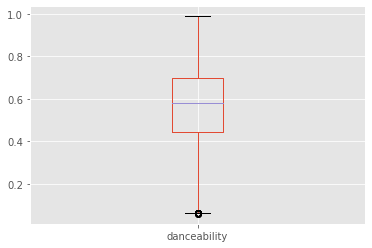

In [21]:
data['danceability'].plot(kind='box')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24698 entries, 0 to 6907
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             24698 non-null  object 
 1   artist            24698 non-null  object 
 2   uri               24698 non-null  object 
 3   danceability      24698 non-null  float64
 4   energy            24698 non-null  float64
 5   key               24698 non-null  int64  
 6   loudness          24698 non-null  float64
 7   mode              24698 non-null  int64  
 8   speechiness       24698 non-null  float64
 9   acousticness      24698 non-null  float64
 10  instrumentalness  24698 non-null  float64
 11  liveness          24698 non-null  float64
 12  valence           24698 non-null  float64
 13  tempo             24698 non-null  float64
 14  duration_ms       24698 non-null  int64  
 15  time_signature    24698 non-null  int64  
 16  chorus_hit        24698 non-null  float64

In [23]:
# 가수 이름 전처리

In [30]:
hits.groupby('artist')['track'].agg(len).sort_values(ascending = False)

artist
Madonna                                             53
Glee Cast                                           52
Taylor Swift                                        52
Drake                                               51
Tim McGraw                                          45
                                                    ..
Jennifer Lopez Featuring Big Pun & Fat Joe           1
Jennifer Lopez Featuring DJ Khaled & Cardi B         1
Jennifer Lopez Featuring Fat Joe                     1
Jennifer Lopez Featuring Iggy Azalea Or Pitbull      1
will.i.am Featuring Mick Jagger & Jennifer Lopez     1
Name: track, Length: 4934, dtype: int64

In [31]:
a = hits.sort_values(by=['artist', 'track'] ,ascending=False)

In [37]:
a['artist'].value_counts

<bound method IndexOpsMixin.value_counts of 4325    will.i.am Featuring Mick Jagger & Jennifer Lopez
2730                   will.i.am Featuring Justin Bieber
352                              will.i.am & Nicki Minaj
2496                          will.i.am & Britney Spears
1394                                           will.i.am
                              ...                       
68                                   "Weird Al" Yankovic
1407                                 "Weird Al" Yankovic
1779                                 "Weird Al" Yankovic
2134                                 "Weird Al" Yankovic
1778                                 "Weird Al" Yankovic
Name: artist, Length: 12349, dtype: object>

In [ ]:
# 섹션 eda